**Import all libraries**

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Read the train data**

In [210]:
train_data=pd.read_csv('train_ctrUa4K.csv')

**study the train data**

In [211]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [212]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [213]:
train_data.shape

(614, 13)

In [214]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [215]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


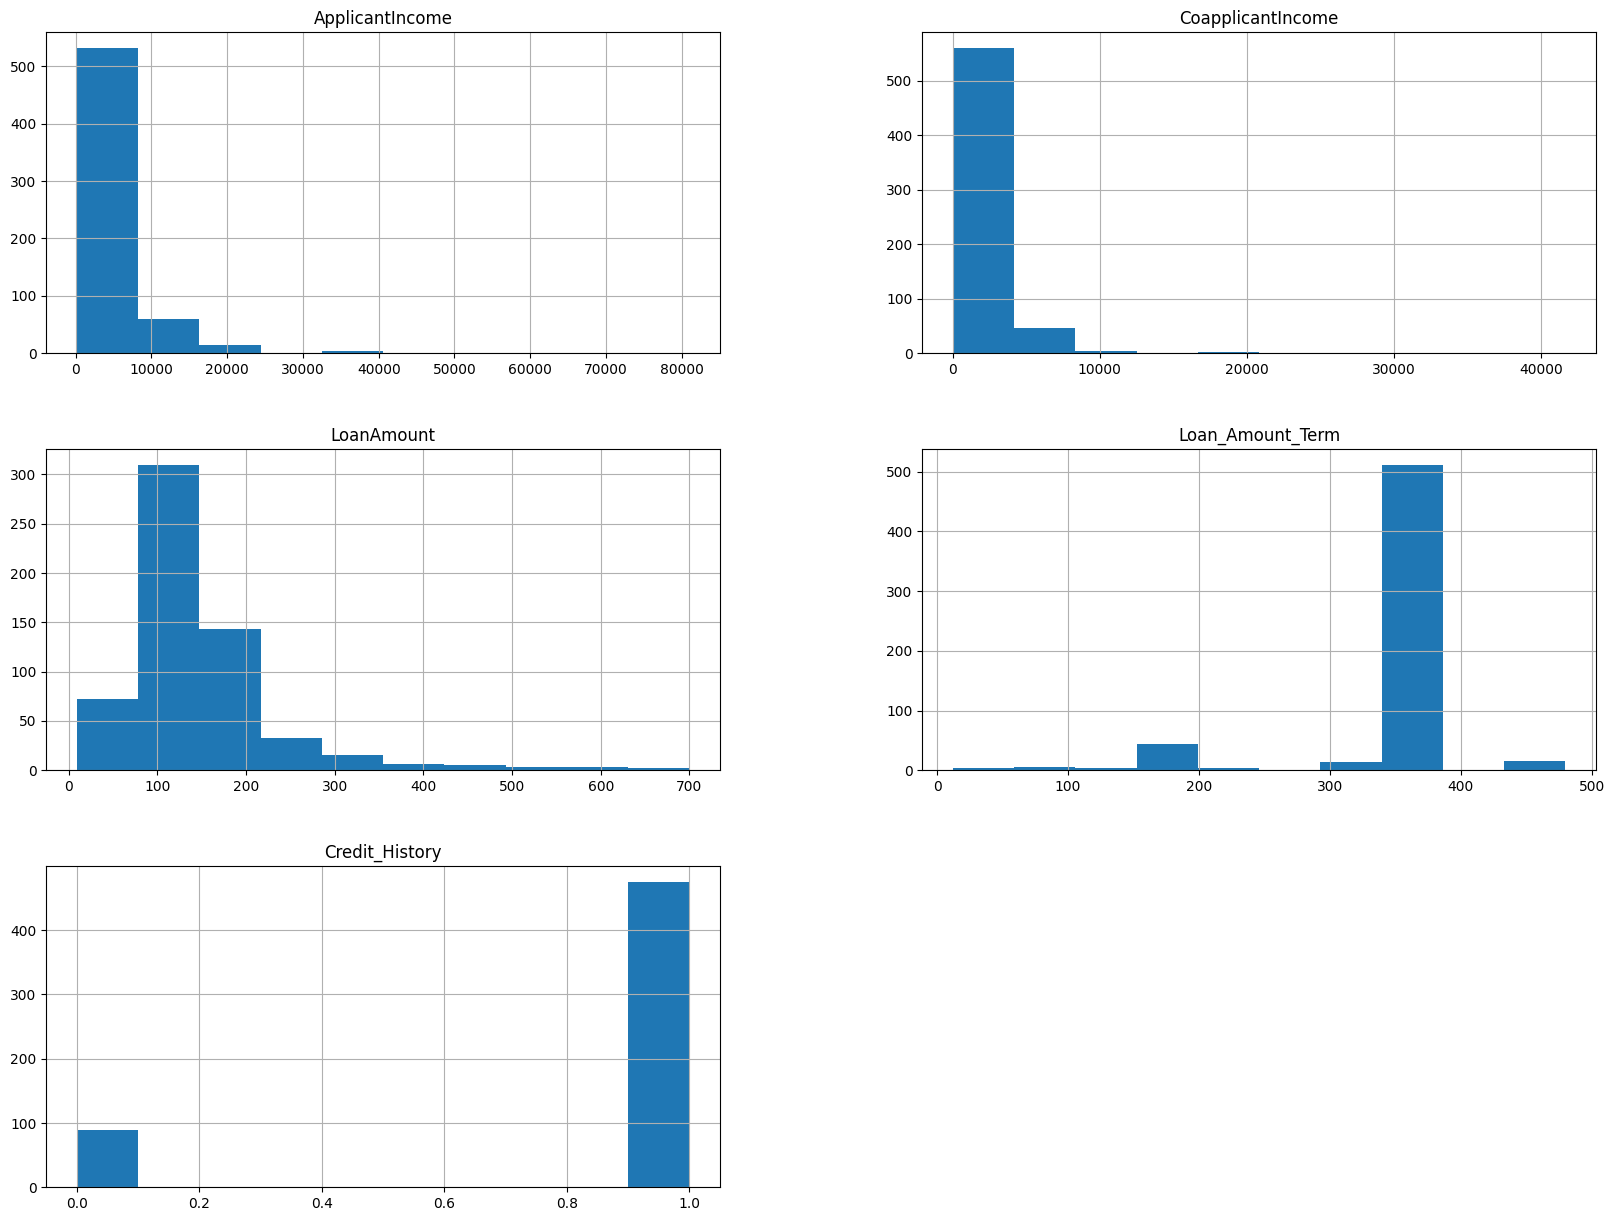

In [216]:
train_data.hist(figsize=(20,15))
plt.show()

In [217]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

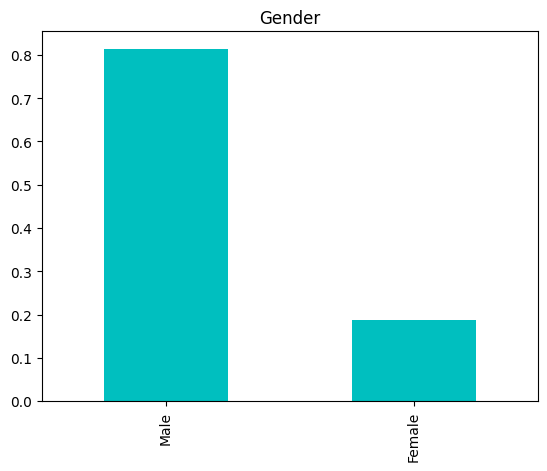

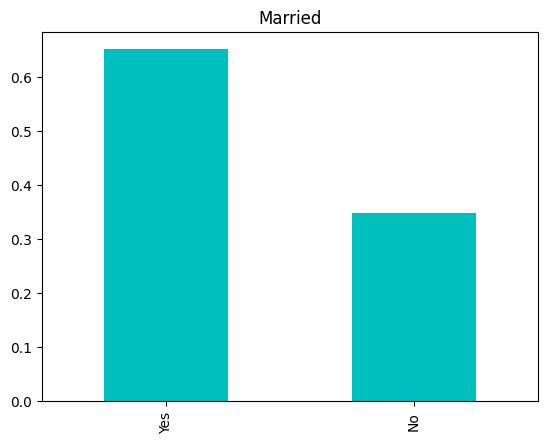

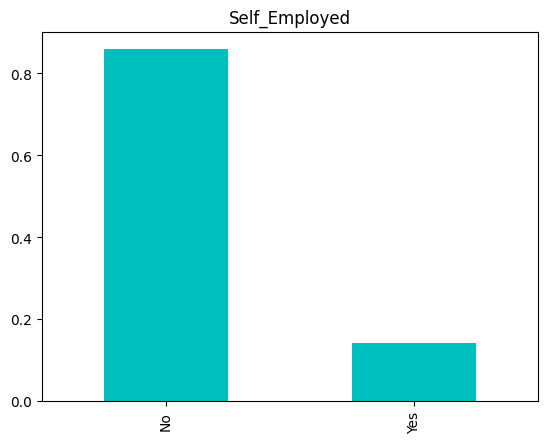

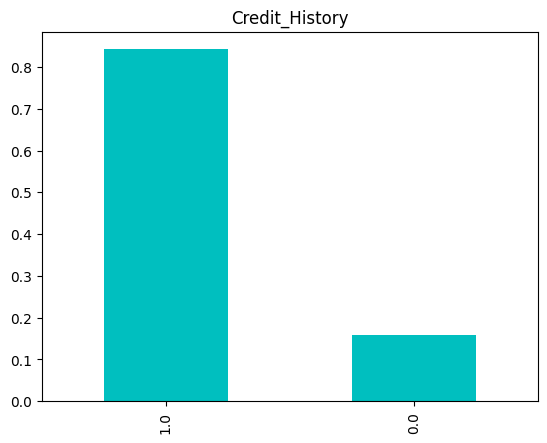

In [218]:
train_data['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',color = 'c')
plt.show()
train_data['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color = 'c')
plt.show()
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color = 'c')
plt.show()
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color = 'c')
plt.show()

**Null value detection and filling**

In [219]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
obj_val=['Gender','Married','Dependents','Self_Employed']
for i in obj_val:
  train_data[i]=train_data[i].fillna(method='ffill')

In [221]:
int_val=['LoanAmount','Loan_Amount_Term','Credit_History']
for k in int_val:
  train_data[k]=train_data[k].fillna(train_data[k].median())

In [222]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Since data is sensitive no use for detection of outliers and handling them**

In [223]:
train_data.drop(['Loan_ID'],axis=1,inplace=True)

**Data Encoding**

In [224]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [225]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [226]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [227]:
cols=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

for j in cols:
  train_data[j]=le.fit_transform(train_data[j])

In [228]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


**Scaling using MinMaxScaler**

In [229]:
from sklearn.preprocessing import MinMaxScaler

In [230]:
minmax=MinMaxScaler()

In [231]:
scaled_train_data=minmax.fit_transform(train_data)

In [232]:
train_data=pd.DataFrame(scaled_train_data)

In [233]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.814332,0.651466,0.253529,0.218241,0.140065,0.064978,0.038910,0.197905,0.706005,0.855049,0.518730,0.687296
std,0.389155,0.476895,0.337335,0.413389,0.347338,0.075560,0.070229,0.121718,0.137668,0.352339,0.393741,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.033735,0.000000,0.132055,0.743590,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.045300,0.028524,0.172214,0.743590,1.000000,0.500000,1.000000
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.069821,0.055134,0.225398,0.743590,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Load the test_data and doing all the preprocessing steps**

In [234]:
test_data=pd.read_csv('test_lAUu6dG.csv')

In [235]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [236]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [237]:
test_data.shape

(367, 12)

In [238]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [239]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Check for null values**

In [240]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [241]:
test_obj=['Gender','Dependents','Self_Employed']
for f in test_obj:
  test_data[f]=test_data[f].fillna(method='ffill')

In [242]:
test_int=['LoanAmount','Loan_Amount_Term','Credit_History']
for u in test_int:
  test_data[u]=test_data[u].fillna(test_data[u].median())

In [243]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [244]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [245]:
test_data.drop(['Loan_ID'],axis=1,inplace=True)

In [246]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Encoding**

In [247]:
test_enco=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for e in test_enco:
  test_data[e]=le.fit_transform(test_data[e])

In [248]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


**Scaling**

In [249]:
scaled_test_data=minmax.fit_transform(test_data)

In [250]:
test_data=pd.DataFrame(scaled_test_data)

In [251]:
test_data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.792916,0.634877,0.282470,0.228883,0.103542,0.066258,0.065399,0.206860,0.710597,0.839237,0.539510
std,0.405770,0.482122,0.360233,0.420687,0.305082,0.067707,0.097260,0.116781,0.136410,0.367814,0.412168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.039488,0.000000,0.139847,0.746835,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.052200,0.042708,0.185824,0.746835,1.000000,0.500000
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.069765,0.101271,0.248084,0.746835,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [252]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       367 non-null    float64
 1   1       367 non-null    float64
 2   2       367 non-null    float64
 3   3       367 non-null    float64
 4   4       367 non-null    float64
 5   5       367 non-null    float64
 6   6       367 non-null    float64
 7   7       367 non-null    float64
 8   8       367 non-null    float64
 9   9       367 non-null    float64
 10  10      367 non-null    float64
dtypes: float64(11)
memory usage: 31.7 KB


**Now we can do all the modelling in train_data**

In [253]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


Train_test_split

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
X=train_data.drop(11,axis=1)
y=train_data[11]

In [256]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [257]:
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: 11, dtype: float64

In [258]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**LogisticRegression**

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [260]:
logr=LogisticRegression()

In [261]:
logr_model=logr.fit(X_train,y_train)
logr_pred=model.predict(X_test)
accuracy_score(y_test,logr_pred)

0.7886178861788617

In [262]:
logr_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

**Decision_tree**

In [263]:
from sklearn.tree import DecisionTreeClassifier
dec_class = DecisionTreeClassifier()
dec_model = dec_class.fit(X_train,y_train)
dec_pred = dec_model.predict(X_test)
accuracy_score(y_test,dec_pred)

0.7235772357723578

In [264]:
dec_pred

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1.])

**SVM**

In [265]:
from sklearn.svm import SVC
svm_class = SVC(kernel = 'linear')
svm_model = svm_class.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)
accuracy_score(y_test,svm_pred)

0.7886178861788617

In [266]:
svm_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

**Random_Forest**

In [267]:
from sklearn.ensemble import RandomForestClassifier
rand_class = RandomForestClassifier()
rand_model = rand_class.fit(X_train,y_train)
rand_pred = rand_model.predict(X_test)
accuracy_score(y_test,rand_pred)

0.7723577235772358

In [268]:
rand_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1.])

**Cross_Validation**

In [269]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skf = StratifiedKFold(n_splits=10)

In [270]:
skf_logr = cross_val_score(model,X,y,cv=skf)
np.mean(skf_logr)

0.8095716552088842

**The best model among these are LogisticRegression**

In [271]:
logr_pred = logr_model.predict(test_data)

**Sample_submission data reading**

In [272]:
sample_data=pd.read_csv('sample_submission_49d68Cx.csv')

In [273]:
sample_data

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [274]:
sample_data['Loan_Status']=logr_pred

In [275]:
sample_data['Loan_Status'].replace(0, 'N',inplace=True)
sample_data['Loan_Status'].replace(1, 'Y',inplace=True)

In [276]:
sample_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


**converting sample submission dataset to csv**

In [277]:
pd.DataFrame(sample_data, columns=['Loan_ID','Loan_Status']).to_csv('shyamlalh_Log_reg.csv',index=False)

In [278]:
my_data=pd.read_csv('shyamlalh_Log_reg.csv')

In [279]:
my_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


**Predicted by Decision tree**

In [289]:
dec_tree_prediction=dec_model.predict(test_data)
sample_data['Loan_Status']=dec_tree_prediction
sample_data['Loan_Status'].replace(0, 'N',inplace=True)
sample_data['Loan_Status'].replace(1, 'Y',inplace=True)

In [290]:
pd.DataFrame(sample_data, columns=['Loan_ID','Loan_Status']).to_csv('shyamlalh_dec_tree.csv',index=False)

**Predicted by svm**

In [291]:
svm_prediction = svm_model.predict(test_data)
sample_data['Loan_Status']=svm_prediction
sample_data['Loan_Status'].replace(0, 'N',inplace=True)
sample_data['Loan_Status'].replace(1, 'Y',inplace=True)

In [292]:
pd.DataFrame(sample_data, columns=['Loan_ID','Loan_Status']).to_csv('shyamlalh_svm.csv',index=False)

**Predicted using RandomForest**

In [293]:
random_prediction= rand_model.predict(test_data)
sample_data['Loan_Status']=random_prediction
sample_data['Loan_Status'].replace(0, 'N',inplace=True)
sample_data['Loan_Status'].replace(1, 'Y',inplace=True)

In [294]:
pd.DataFrame(sample_data, columns=['Loan_ID','Loan_Status']).to_csv('shyamlalh_random.csv',index=False)